<a href="https://colab.research.google.com/github/atdinescu/ricegenome/blob/master/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Now, let's link to your GoogleDrive. Run this cell and follow the authorization instructions:
#(We recommend putting a copy of the github repo in your google drive if you are using the demo "examples")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/Rice genomics project/final results/new/'

# Preprocessing data for models

### Install scikit-allel

In [0]:
!pip install scikit-allel

In [0]:
import numpy as np

import allel
# check which version is installed
print(allel.__version__)

### Convert vcf file to numpy array and save to drive

In [0]:
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/aus_perm_grain_pvalue_0.00001.vcf', path/'/content/drive/My Drive/Rice genomics project/final results/new/aus_grain_0.00001.npz', fields='*', overwrite=True)
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/indica_grain_0.000001.vcf', '/content/drive/My Drive/Rice genomics project/final results/new/indica_grain_0.000001.npz', fields='*', overwrite=True)

In [0]:
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/aus_perm_salt.vcf', '/content/drive/My Drive/Rice genomics project/final results/new/aus_salt.npz', fields='*', overwrite=True)
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/indica_salt.vcf', '/content/drive/My Drive/Rice genomics project/final results/new/indica_salt.npz', fields='*', overwrite=True)
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/aus_perm_time.vcf', '/content/drive/My Drive/Rice genomics project/final results/new/aus_time.npz', fields='*', overwrite=True)
allel.vcf_to_npz('/content/drive/My Drive/Rice genomics project/final results/new/indica_time.vcf', '/content/drive/My Drive/Rice genomics project/final results/new/indica_time.npz', fields='*', overwrite=True)

### Read in genotype data as numpy array and encode SNP markers as {-1,0,1}

In [0]:
import numpy as np
aus_grain_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_grain_0.00001.npz',  allow_pickle = True)
indica_grain_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/indica_grain_0.000001.npz',  allow_pickle = True)

In [0]:
aus_salt_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_salt.npz',  allow_pickle = True)
indica_salt_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/indica_salt.npz',  allow_pickle = True)

aus_time_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_time.npz',  allow_pickle = True)
indica_time_callset = np.load('/content/drive/My Drive/Rice genomics project/final results/new/indica_time.npz',  allow_pickle = True)

In [0]:
sorted(aus_grain_callset.keys())
sorted(indica_grain_callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/PR',
 'variants/QUAL',
 'variants/REF',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

In [0]:
aus_callset['variants/ID']

array(['26597', '53956', '67585', ..., '373223958', '373238779',
       '373244096'], dtype=object)

In [0]:
aus_samplenames = aus_callset['samples']
indica_samplenames = indica_callset['samples']

In [0]:
aus_grain_gt = allel.GenotypeArray(aus_grain_callset['calldata/GT'])
indica_grain_gt = allel.GenotypeArray(indica_grain_callset['calldata/GT'])

In [0]:
aus_salt_gt = allel.GenotypeArray(aus_salt_callset['calldata/GT'])
indica_salt_gt = allel.GenotypeArray(indica_salt_callset['calldata/GT'])
aus_time_gt = allel.GenotypeArray(aus_time_callset['calldata/GT'])
indica_time_gt = allel.GenotypeArray(indica_time_callset['calldata/GT'])

In [0]:
aus_grain_gt_transpose = aus_grain_gt.transpose(1, 0, 2)
print(aus_grain_gt_transpose.shape)

indica_grain_gt_transpose = indica_grain_gt.transpose(1, 0, 2)
print(indica_grain_gt_transpose.shape)

aus_grain_x = aus_grain_gt_transpose[:,:,0]
indica_grain_x = indica_grain_gt_transpose[:,:,0]

# Rewrite genotypes (0,0 to -1, 0,1 to 0, 1,1 to 1)
for i in range(aus_grain_x.shape[0]):
  for j in range(aus_grain_x.shape[1]):
    if (aus_grain_gt_transpose[i,j,0] == 1 and aus_grain_gt_transpose[i,j,1] == 1):
      aus_grain_x[i,j] = 1
    elif (aus_grain_gt_transpose[i,j,0] == 0 and aus_grain_gt_transpose[i,j,1] == 1):
      aus_grain_x[i,j] = 0
    elif (aus_grain_gt_transpose[i,j,0] == 0 and aus_grain_gt_transpose[i,j,1] == 0):
      aus_grain_x[i,j] = -1  

for i in range(indica_grain_x.shape[0]):
  for j in range(indica_grain_x.shape[1]):
    if (indica_grain_gt_transpose[i,j,0] == 1 and indica_grain_gt_transpose[i,j,1] == 1):
      indica_grain_x[i,j] = 1
    elif (indica_grain_gt_transpose[i,j,0] == 0 and indica_grain_gt_transpose[i,j,1] == 1):
      indica_grain_x[i,j] = 0
    elif (indica_grain_gt_transpose[i,j,0] == 0 and indica_grain_gt_transpose[i,j,1] == 0):
      indica_grain_x[i,j] = -1 

(151, 2110, 2)
(1056, 6390, 2)


In [0]:
aus_salt_gt_transpose = aus_salt_gt.transpose(1, 0, 2)
print(aus_salt_gt_transpose.shape)

indica_salt_gt_transpose = indica_salt_gt.transpose(1, 0, 2)
print(indica_salt_gt_transpose.shape)

aus_salt_x = aus_salt_gt_transpose[:,:,0]
indica_salt_x = indica_salt_gt_transpose[:,:,0]

# Rewrite genotypes (0,0 to -1, 0,1 to 0, 1,1 to 1)
for i in range(aus_salt_x.shape[0]):
  for j in range(aus_salt_x.shape[1]):
    if (aus_salt_gt_transpose[i,j,0] == 1 and aus_salt_gt_transpose[i,j,1] == 1):
      aus_salt_x[i,j] = 1
    elif (aus_salt_gt_transpose[i,j,0] == 0 and aus_salt_gt_transpose[i,j,1] == 1):
      aus_salt_x[i,j] = 0
    elif (aus_salt_gt_transpose[i,j,0] == 0 and aus_salt_gt_transpose[i,j,1] == 0):
      aus_salt_x[i,j] = -1 
    else:
      aus_salt_x[i,j] = 0

for i in range(indica_salt_x.shape[0]):
  for j in range(indica_salt_x.shape[1]):
    if (indica_salt_gt_transpose[i,j,0] == 1 and indica_salt_gt_transpose[i,j,1] == 1):
      indica_salt_x[i,j] = 1
    elif (indica_salt_gt_transpose[i,j,0] == 0 and indica_salt_gt_transpose[i,j,1] == 1):
      indica_salt_x[i,j] = 0
    elif (indica_salt_gt_transpose[i,j,0] == 0 and indica_salt_gt_transpose[i,j,1] == 0):
      indica_salt_x[i,j] = -1 
    else:
      indica_salt_x[i,j] = 0

aus_time_gt_transpose = aus_time_gt.transpose(1, 0, 2)
print(aus_time_gt_transpose.shape)

indica_time_gt_transpose = indica_time_gt.transpose(1, 0, 2)
print(indica_time_gt_transpose.shape)

aus_time_x = aus_time_gt_transpose[:,:,0]
indica_time_x = indica_time_gt_transpose[:,:,0]

# Rewrite genotypes (0,0 to -1, 0,1 to 0, 1,1 to 1)
for i in range(aus_time_x.shape[0]):
  for j in range(aus_time_x.shape[1]):
    if (aus_time_gt_transpose[i,j,0] == 1 and aus_time_gt_transpose[i,j,1] == 1):
      aus_time_x[i,j] = 1
    elif (aus_time_gt_transpose[i,j,0] == 0 and aus_time_gt_transpose[i,j,1] == 1):
      aus_time_x[i,j] = 0
    elif (aus_time_gt_transpose[i,j,0] == 0 and aus_time_gt_transpose[i,j,1] == 0):
      aus_time_x[i,j] = -1
    else:
      aus_time_x[i,j] = 0  

for i in range(indica_time_x.shape[0]):
  for j in range(indica_time_x.shape[1]):
    if (indica_time_gt_transpose[i,j,0] == 1 and indica_time_gt_transpose[i,j,1] == 1):
      indica_time_x[i,j] = 1
    elif (indica_time_gt_transpose[i,j,0] == 0 and indica_time_gt_transpose[i,j,1] == 1):
      indica_time_x[i,j] = 0
    elif (indica_time_gt_transpose[i,j,0] == 0 and indica_time_gt_transpose[i,j,1] == 0):
      indica_time_x[i,j] = -1
    else:
      indica_time_x[i,j] = 0 

(151, 1043, 2)
(1056, 1309, 2)
(151, 2757, 2)
(1056, 113244, 2)


In [0]:
np.save('/content/drive/My Drive/Rice genomics project/final results/new/aus_grain_x.npy', aus_grain_x)
np.save('/content/drive/My Drive/Rice genomics project/final results/new/indica_grain_x.npy', indica_grain_x)

In [0]:
np.save('/content/drive/My Drive/Rice genomics project/final results/new/aus_salt_x.npy', aus_salt_x)
np.save('/content/drive/My Drive/Rice genomics project/final results/new/indica_salt_x.npy', indica_salt_x)
np.save('/content/drive/My Drive/Rice genomics project/final results/new/aus_time_x.npy', aus_time_x)
np.save('/content/drive/My Drive/Rice genomics project/final results/new/indica_time_x.npy', indica_time_x)

# Read Excel files mapping output

### Import from new Excel files

In [0]:
import numpy as np
import pandas as pd

column_names = ['NAME', 'IRIS_ID', 'ACCESSION', 'SUBPOPULATION', 'COUNTRY', 'GRAIN-WEIGHT', 'SALT-TOLERANCE', 'TIME-TO-FLOWERING']

indica_grain = pd.read_excel (r'/content/drive/My Drive/Rice genomics project/final results/indica_mappingout_2.xlsx', header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7], names=column_names)
indica_id = pd.DataFrame(indica_grain, columns= ['IRIS_ID'])
indica_grainweight = pd.DataFrame(indica_grain, columns= ['GRAIN-WEIGHT'])
indica_salt = pd.DataFrame(indica_grain, columns= ['SALT-TOLERANCE'])
indica_flowertime = pd.DataFrame(indica_grain, columns= ['TIME-TO-FLOWERING'])

aus_grain = pd.read_excel (r'/content/drive/My Drive/Rice genomics project/final results/aus_mappingout_2.xlsx', header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7], names=column_names)
aus_id = pd.DataFrame(aus_grain, columns= ['IRIS_ID'])
aus_grainweight = pd.DataFrame(aus_grain, columns= ['GRAIN-WEIGHT'])
aus_salt = pd.DataFrame(aus_grain, columns= ['SALT-TOLERANCE'])
aus_flowertime = pd.DataFrame(aus_grain, columns= ['TIME-TO-FLOWERING'])

In [0]:
aus_x_grain = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_grain_x.npy',  allow_pickle = True)
indica_x_grain = np.load('/content/drive/My Drive/Rice genomics project/final results/new/indica_grain_x.npy',  allow_pickle = True)

In [0]:
aus_x_salt = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_salt_x.npy',  allow_pickle = True)
indica_x_salt = np.load('/content/drive/My Drive/Rice genomics project/final results/indica_salt_x.npy',  allow_pickle = True)
aus_x_time = np.load('/content/drive/My Drive/Rice genomics project/final results/new/aus_time_x.npy',  allow_pickle = True)
indica_x_time = np.load('/content/drive/My Drive/Rice genomics project/final results/new/indica_time_x.npy',  allow_pickle = True)

# Models

### Multiple linear regression

In [0]:
def linear_regression(x,y):
  from sklearn import metrics
  from sklearn.model_selection import cross_val_score, train_test_split
  from sklearn.linear_model import LinearRegression

  x_train, x_test, y_train, y_test = train_test_split( \
    x, y, test_size=0.1)

  lin_reg = LinearRegression()

  MSE = cross_val_score(lin_reg, x_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

  mean_MSE = np.mean(MSE)

  lin_reg.fit(x_train, y_train)

  print (mean_MSE)

  y_pred = lin_reg.predict(x_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  print(r2_score)


  return mean_MSE

In [89]:
print(aus_x_grain.shape)

(151, 2110)


In [64]:
lin_reg_MSE_ausgrain = linear_regression(aus_x_grain, aus_grainweight)

-0.10729325963916356
0.5457912547764137


In [101]:
print(aus_x_salt.shape)

(151, 1043)


In [103]:
lin_reg_MSE_aussalt = linear_regression(aus_x_salt, aus_salt)

-1.0432588551523676
0.6389904638955303


In [84]:
print(aus_x_time.shape)

(151, 2757)


In [56]:
lin_reg_MSE_ausflower = linear_regression(aus_x_time, aus_flowertime)

-66.27013374459074
0.3161947028177965


In [85]:
print(indica_x_grain.shape)

(1056, 6390)


In [106]:
lin_reg_MSE_indicagrain = linear_regression(indica_x_grain, indica_grainweight)

-0.22749179625973973
0.12123973497740215


In [104]:
print(indica_x_salt.shape)

(1056, 25945)


In [105]:
lin_reg_MSE_indicasalt = linear_regression(indica_x_salt, indica_salt)

-1.6359156851074157
0.3004004941261087


In [87]:
print(indica_x_time.shape)

(1056, 113244)


In [88]:
lin_reg_MSE_indicatime = linear_regression(indica_x_time, indica_flowertime)

-234.6347568217421
0.4289489418774959


### Ridge regression

In [0]:
def ridge_regression(x,y):
  from sklearn import metrics
  from sklearn.model_selection import GridSearchCV, train_test_split
  from sklearn.linear_model import Ridge

  x_train, x_test, y_train, y_test = train_test_split( \
    x, y, test_size=0.1)

  ridge = Ridge()

  parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 15, 20]}

  ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=10)

  ridge_regressor.fit(x_train,y_train)

  print(ridge_regressor.best_params_)
  print(ridge_regressor.best_score_)

  y_pred = ridge_regressor.predict(x_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  print(r2_score)


  return ridge_regressor.best_params_, ridge_regressor.best_score_

In [29]:
ridge_reg_bestparam_ausgrain, ridge_reg_bestscore_ausgrain = ridge_regression(aus_x_grain, aus_grainweight)

{'alpha': 20}
-0.09652827229001688
0.7643512410667891


In [43]:
ridge_reg_bestparam_aussalt, ridge_reg_bestscore_aussalt = ridge_regression(aus_x_salt, aus_salt)

{'alpha': 1e-05}
-0.8994330386209249
0.37886392144852876


In [37]:
ridge_reg_bestparam_austime, ridge_reg_bestscore_austime = ridge_regression(aus_x_time, aus_flowertime)

{'alpha': 20}
-64.11893020893811
0.7574575447821522


In [32]:
ridge_reg_bestparam_indicagrain, ridge_reg_bestscore_indicagrain = ridge_regression(indica_x_grain, indica_grainweight)

{'alpha': 20}
-0.20928962670870593
0.23757269702869044


In [49]:
ridge_reg_bestparam_indicasalt, ridge_reg_bestscore_indicasalt = ridge_regression(indica_x_salt, indica_salt)

{'alpha': 20}
-2.6548531296000535
0.2968744409175623


In [34]:
ridge_reg_bestparam_indicatime, ridge_reg_bestscore_indicatime = ridge_regression(indica_x_time, indica_flowertime)

{'alpha': 20}
-234.7075669296314
0.5054187132375502


### Lasso regression

In [0]:
def lasso_regression(x,y):
  from sklearn import metrics
  from sklearn.linear_model import Lasso
  from sklearn.model_selection import GridSearchCV, train_test_split
  
  x_train, x_test, y_train, y_test = train_test_split( \
    x, y, test_size=0.1)

  lasso = Lasso(random_state = 0, max_iter=10e5)

  parameters = {'alpha': [1e-3, 1e-2, 0.1]}
  # parameters = {'alpha': [1e-3, 1e-2, 0.1, 1, 5, 10, 15, 20]}

  lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=10)

  lasso_regressor.fit(x_train,y_train)

  print(lasso_regressor.best_params_)
  print(lasso_regressor.best_score_)

  y_pred = lasso_regressor.predict(x_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  print(r2_score)

  return lasso_regressor.best_params_, lasso_regressor.best_score_

In [122]:
lasso_reg_bestparam_ausgrain, lasso_reg_bestscore_ausgrain = lasso_regression(aus_x_grain, aus_grainweight)

{'alpha': 0.01}
-0.1197575638522265
0.5612959588974393


In [109]:
lasso_reg_bestparam_aussalt, lasso_reg_bestscore_aussalt = lasso_regression(aus_x_salt, aus_salt)

{'alpha': 0.01}
-0.9516110938738175
0.5698637047418154


In [115]:
lasso_reg_bestparam_austime, lasso_reg_bestscore_austime = lasso_regression(aus_x_time, aus_flowertime)

{'alpha': 0.001}
-80.81372834304557
0.578211207013346


In [111]:
lasso_reg_bestparam_indicagrain, lasso_reg_bestscore_indicagrain = lasso_regression(indica_x_grain, indica_grainweight)

{'alpha': 0.01}
-0.1482467956835746
0.32186969672125954


In [112]:
lasso_reg_bestparam_indicasalt, lasso_reg_bestscore_indicasalt = lasso_regression(indica_x_salt, indica_salt)

{'alpha': 0.01}
-2.1829010973864653
0.30771004266476054


In [123]:
lasso_reg_bestparam_indicatime, lasso_reg_bestscore_indicatime = lasso_regression(indica_x_time, indica_flowertime)

KeyboardInterrupt: ignored

### Support Vector Machines

In [0]:
def svm_test(x,y):
  from sklearn import svm, metrics
  from sklearn.model_selection import GridSearchCV, train_test_split

  x_train, x_test, y_train, y_test = train_test_split( \
    x, y, test_size=0.1)

  Cs = [0.001, 0.01, 0.1, 1]
  gammas = [1e-4, 1e-3, 0.01, 0.1]
  kernels = ['linear']
  param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
  svm_model = GridSearchCV(svm.SVR(), param_grid, cv=10)

  svm_model.fit(x_train, y_train.values.ravel())

  print(svm_model.best_params_)
  print(svm_model.best_score_)

  y_pred = svm_model.predict(x_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  print(r2_score)
  
  return y_test, y_pred,svm_model.best_params_, svm_model.best_score_

In [24]:
svm_y_test_ausgrain, svm_y_pred_ausgrain, svm_bestparam_ausgrain, svm_reg_bestscore_ausgrain = svm_test(aus_x_grain, aus_grainweight)

{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
0.4634540125484651
0.7307698460834461


In [23]:
svm_y_test_aussalt, svm_y_pred_aussalt, svm_bestparam_aussalt, svm_bestscore_aussalt = svm_test(aus_x_salt, aus_salt)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
0.46043240389901846
0.6177477081136034


In [21]:
svm_y_test_austime, svm_y_pred_austime, svm_bestparam_austime, svm_bestscore_austime = svm_test(aus_x_time, aus_flowertime)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
0.44276507816320504
0.6742885717090017


In [25]:
svm_y_test_indicagrain, svm_y_pred_indicagrain, svm_bestparam_indicagrain, svm_bestscore_indicagrain = svm_test(indica_x_grain, indica_grainweight)

{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
0.08670354066136884
0.3447018137142599


In [0]:
svm_y_test_indicasalt, svm_y_pred_indicasalt, svm_bestparam_indicasalt, svm_bestscore_indicasalt = svm_test(indica_x_salt, indica_salt)

In [0]:
svm_y_test_indicatime, svm_y_pred_indicatime, svm_bestparam_indicatime, svm_bestscore_indicatime = svm_test(indica_x_time, indica_flowertime)

### Scatter plots on SVM data

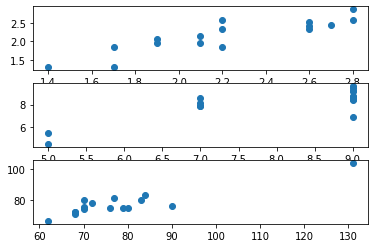

In [26]:
import matplotlib.pyplot as plt

plt.subplot(3, 1, 1)
plt.scatter(svm_y_test_ausgrain, svm_y_pred_ausgrain)

plt.subplot(3, 1, 2)
plt.scatter(svm_y_test_aussalt, svm_y_pred_aussalt)

plt.subplot(3, 1, 3)
plt.scatter(svm_y_test_austime, svm_y_pred_austime)

(106, 1)
(106,)


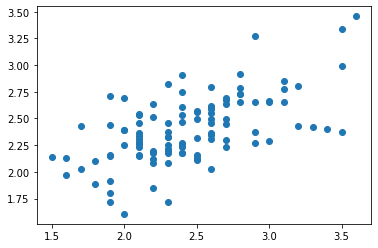

In [27]:
print(svm_y_test_indicagrain.shape)
print(svm_y_pred_indicagrain.shape)

plt.subplot(3, 1, 1)
plt.scatter(svm_y_test_indicagrain, svm_y_pred_indicagrain)

plt.subplot(3, 1, 2)
plt.scatter(svm_y_test_indicasalt, svm_y_pred_indicasalt)

plt.subplot(3, 1, 3)
plt.scatter(svm_y_test_indicaflower, svm_y_pred_indicatime)